In [211]:
#import my local file, a CSV file of songs from spotify with different audio descriptions and features. 
import pandas as pd
file = 'song_data.csv'
df = pd.read_csv (file)

In [212]:
#install xgboost which will be used later
!pip install xgboost

In [213]:
#install plotly for any visualizations down the road
!pip install plotly


In [214]:
#install profiling to get a good look at the features and any problems that might arise
!pip install pandas-profiling

In [215]:
#import plotly for any visualizations and possible heroku app
import plotly.express as px

In [216]:
#look at the data
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [217]:
#take a look at the shape of the data, there are thousands of observations which will be helpful
df.shape

(18835, 15)

In [218]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, minimal=True).to_notebook_iframe()

profile

In [219]:
df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [220]:
#dropping any duplicate entries in the dataframe
df.drop_duplicates(keep=False,inplace=True) 

In [221]:
df.shape

(12721, 15)

In [222]:
df['song_popularity'].nunique()

93

In [223]:
df['song_popularity'].describe()

count    12721.000000
mean        46.211304
std         19.496024
min          0.000000
25%         35.000000
50%         49.000000
75%         60.000000
max         93.000000
Name: song_popularity, dtype: float64

In [224]:
#drop any row in song popularity that is a 0 since that is equivalent to a null value
index_delete = df.index[df['song_popularity']==0]
df = df.drop(index_delete)

In [225]:
df.shape

(12498, 15)

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12498 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         12498 non-null  object 
 1   song_popularity   12498 non-null  int64  
 2   song_duration_ms  12498 non-null  int64  
 3   acousticness      12498 non-null  float64
 4   danceability      12498 non-null  float64
 5   energy            12498 non-null  float64
 6   instrumentalness  12498 non-null  float64
 7   key               12498 non-null  int64  
 8   liveness          12498 non-null  float64
 9   loudness          12498 non-null  float64
 10  audio_mode        12498 non-null  int64  
 11  speechiness       12498 non-null  float64
 12  tempo             12498 non-null  float64
 13  time_signature    12498 non-null  int64  
 14  audio_valence     12498 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 1.5+ MB


In [227]:
df.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

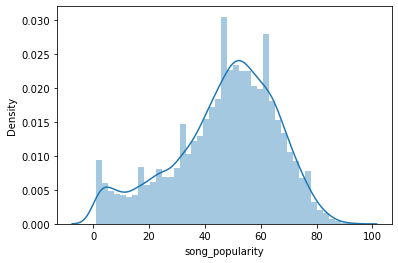

In [228]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.distplot(df['song_popularity']);

In [229]:
#create a new column with a binary classification for song popularity, a song will be considered 'popular' if it has a
#rating of 60 or above. 
df['popular'] = [1 if i>=60 else 0 for i in df.song_popularity ]
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popular
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,1
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,1
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,1
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,1
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,0


In [230]:
#we can see in this new column that about 72% of the songs in the current dataframe are 
#considered 'not popular'
df['popular'].value_counts(normalize=True)

0    0.727876
1    0.272124
Name: popular, dtype: float64

In [231]:
df['tempo'].describe()

count    12498.000000
mean       121.102362
std         29.241674
min          0.000000
25%         98.029000
50%        120.016000
75%        139.952000
max        242.318000
Name: tempo, dtype: float64

there shouldn't be any songs with a tempo of 0, so we will treat that as a null value

In [232]:
#I will replace the 0's in the tempo column with nan
import numpy as np
df['tempo'].replace(0, np.nan, inplace=True)
df['tempo'].describe()

count    12497.000000
mean       121.112053
std         29.222768
min         46.591000
25%         98.029000
50%        120.016000
75%        139.952000
max        242.318000
Name: tempo, dtype: float64

In [233]:
#now that the data is more organized and cleaned, I will create
#a train, validation, and test set of the data
from sklearn.model_selection import train_test_split
train, validate, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])
test.shape

(2500, 16)

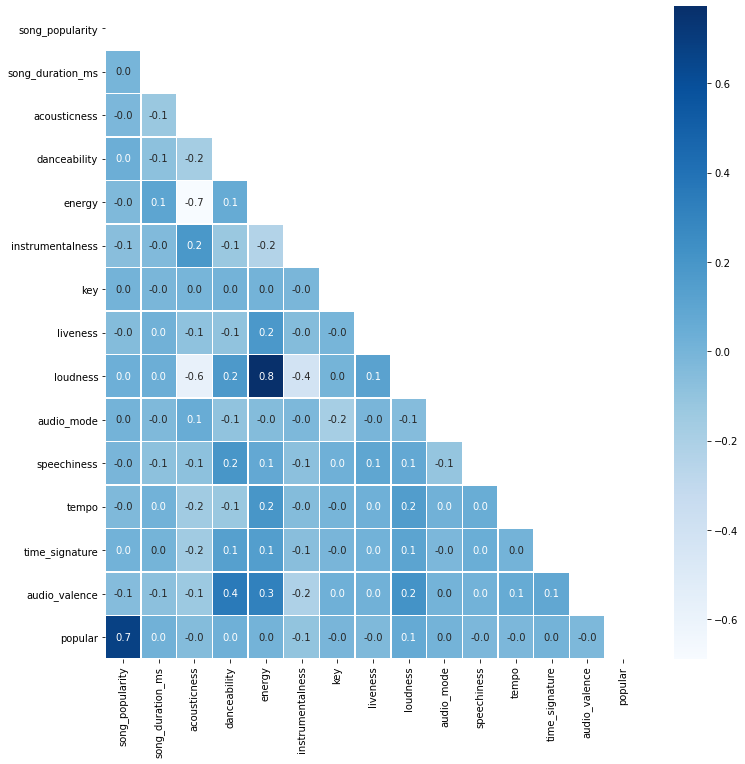

In [234]:
#lets look at the correlation between these features
import matplotlib.pyplot as plt
import seaborn as sns
f,ax = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Blues",mask=mask)
plt.show() 

In [235]:
#right off the bat I can see that there are no items that have a strong correlation with a song being popular

I will use accuracy since my majority class is <50 and >70

In [236]:
target = 'popular'
features = df.columns.drop([target, 'song_popularity'])

X_train = train[features]
y_train = train[target]
X_val = validate[features]
y_val = validate[target]
X_test = test[features]
y_test = test[target]



In [237]:
print('Baseline Accuracy:', y_train.value_counts(normalize=True).max())

Baseline Accuracy: 0.7336623099493198


In [238]:
!pip install category_encoders==2.*

In [239]:
#I will try two different models, a logistic regression, randomforest classifier, and a Xg Boost model

In [240]:
from sklearn.linear_model import LogisticRegression
model_lr = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='median'), 
    StandardScaler(), 
    LogisticRegression()
)

model_lr

Pipeline(steps=[('onehotencoder', OneHotEncoder(use_cat_names=True)),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [241]:
#first lets try making a random forest classifier to see how it will perform 
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
model_rf = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

model_rf.fit(X_train, y_train)
print('Val accuracy', model_rf.score(X_val, y_val))


Val accuracy 0.7052


In [242]:
# we can see that this random forest model is not quite predicting better than the baseline 
#try XG boost
from xgboost import XGBClassifier
pipeline_xg = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'),
    XGBClassifier(random_state=42)
)

pipeline_xg.fit(X_train, y_train)

[12:17:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['song_name'],
                                mapping=[{'col': 'song_name',
                                          'data_type': dtype('O'),
                                          'mapping': Q.M.T.                                           1
Abisko                                           2
Misty Wind                                       3
Win Is Enough                                    4
If You Need Someone                              5
                                              ... 
Faded - Tiesto's Northern Lights Remix        7014
Lose Control (feat. Ciara & Fat Man Scoop)    7015
Only Love Can Break Your Heart                7016
You're The First, The Last, My Everything     7017
NaN                                             -2
Length: 7018, dtyp...
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                      

In [243]:
#we can see that the model does not predict the probability of a song being popular better than the baseline, this 
#seems to be a poor performing model
pipeline_xg.score(X_val, y_val)

0.69

Lets do some Cross Fold Validation to see which model looks the best at predicting. 

In [244]:
from sklearn.model_selection import cross_val_score
scores_lr = cross_val_score(model_lr, X_train, y_train, cv=5)

In [245]:
scores_lr
print('Mean CV accuracy score LR', scores_lr.mean())

Mean CV accuracy score LR 0.7259258172114743


In [246]:
scores_rf = cross_val_score(model_rf, X_train, y_train, cv=5)

In [247]:
print('Mean CV accuracy score RF', scores_rf.mean())

Mean CV accuracy score RF 0.7209925728263287


In [248]:
scores_xg = cross_val_score(pipeline_xg, X_train, y_train, cv=5)

[12:19:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:19:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:19:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:19:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

In [249]:
print('Mean CV accuracy score XG', scores_xg.mean())

Mean CV accuracy score XG 0.6920537247053591


We can see that the Random forest model is doing slightly better than the logistic regression model, but still is not performing better than the baseline

The model that performs the best is the Random Forest model. Let's specifically tune that model

In [250]:
model_rf.named_steps.keys()

dict_keys(['ordinalencoder', 'simpleimputer', 'randomforestclassifier'])

In [251]:
#create a randomized search cv
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
params = {
    'randomforestclassifier__max_depth': range(5,35,5),
    'randomforestclassifier__n_estimators': [25, 50, 75],
    'randomforestclassifier__max_samples': np.arange(0.2,0.8,.2)
}

model_g = GridSearchCV(model_rf, 
                           param_grid=params, 
                           cv=10, 
                           n_jobs=-1, 
                           verbose=1)

In [252]:
model_g.fit(X_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  2.7min finished


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('ordinalencoder',
                                        OrdinalEncoder(cols=['song_name'],
                                                       mapping=[{'col': 'song_name',
                                                                 'data_type': dtype('O'),
                                                                 'mapping': Q.M.T.                                           1
Abisko                                           2
Misty Wind                                       3
Win Is Enough                                    4
If You Need Someone                              5
                                              ... 
Faded - Tiesto's Northern Lights Remix        7014
Lose Control (feat. Ciara & Fat Man Scoop)    7015
Only Love Can Break Your Heart                7016
You're The First, The Last, My Everyt...
Length: 7018, dtype: int64}])),
                                       ('simpleimputer',
       

In [253]:
model_g.best_params_

{'randomforestclassifier__max_depth': 5,
 'randomforestclassifier__max_samples': 0.4,
 'randomforestclassifier__n_estimators': 75}

In [254]:
model_g.best_score_

0.7329958166444147

In [255]:
model_g.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0])

In [256]:
model_RCV = RandomizedSearchCV(
    model_rf, 
    param_distributions = params,
    n_iter=12,
    n_jobs=-1,
    cv=10,
    random_state=42,
    verbose=1
)

In [257]:
model_RCV.fit(X_train, y_train);

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   24.2s finished


In [258]:
model_RCV.best_params_

{'randomforestclassifier__n_estimators': 50,
 'randomforestclassifier__max_samples': 0.8,
 'randomforestclassifier__max_depth': 5}

In [259]:
model_RCV.best_score_

0.7316624833110813

In [260]:
model_RCV.score(X_val, y_val)

0.7088

Our best score looks like its from the gridsearchCV model

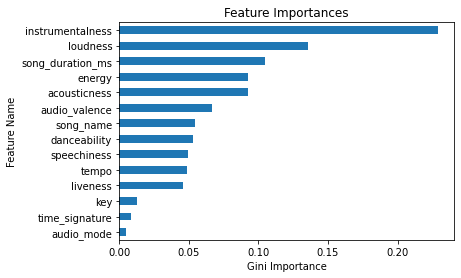

In [261]:
#lets visualize the importance of each feature in creating purity for the model
importances = model_RCV.best_estimator_.named_steps['randomforestclassifier'].feature_importances_
features = X_train.columns
pd.Series(importances, index=features).sort_values().tail(15).plot(kind='barh')
plt.xlabel('Gini Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importances')
plt.show()

We can see that instrumentalness is really important to our model, and audio mode doesn't seem to do much at all for our model, as well as time signature. Let's see if we can improve our model. 

In [262]:
#lets look at permutation importances
from sklearn.inspection import permutation_importance
perm_impo = permutation_importance(model_RCV,
                                  X_val,
                                  y_val,
                                  n_jobs=11, 
                                  random_state=42)


In [263]:
data = {'importances_mean': perm_impo['importances_mean'],
       'importances_std': perm_impo['importances_std']}
df_impo = pd.DataFrame(data, index=X_val.columns)
df_impo.sort_values(by='importances_mean', inplace=True)

In [264]:
df_impo

,importances_mean,importances_std
time_signature,-0.00008,0.000160
song_name,0.00000,0.000000
audio_mode,0.00000,0.000000
audio_valence,0.00008,0.000299
tempo,0.00008,0.000531
key,0.00016,0.000196
liveness,0.00024,0.000196
speechiness,0.00024,0.000196
song_duration_ms,0.00032,0.000160
danceability,0.00032,0.000160


<function matplotlib.pyplot.show(close=None, block=None)>

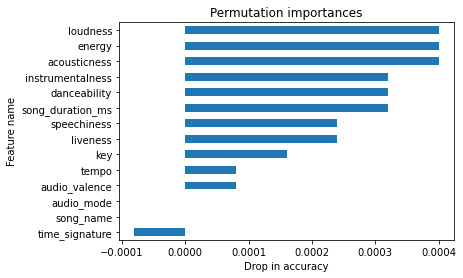

In [280]:
df_impo['importances_mean'].plot(kind='barh')
plt.xlabel('Drop in accuracy')
plt.ylabel('Feature name')
plt.title('Permutation importances')
plt.show

In [266]:
!pip install pdpbox
!pip install shap

In [267]:
df.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence', 'popular'],
      dtype='object')

In [268]:
import matplotlib.pyplot as plt
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'danceability'

isolated = pdp_isolate(
    model=pipeline, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature,
    num_grid_points=50
)


(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <AxesSubplot:>, 'pdp_ax': <AxesSubplot:xlabel='danceability'>})

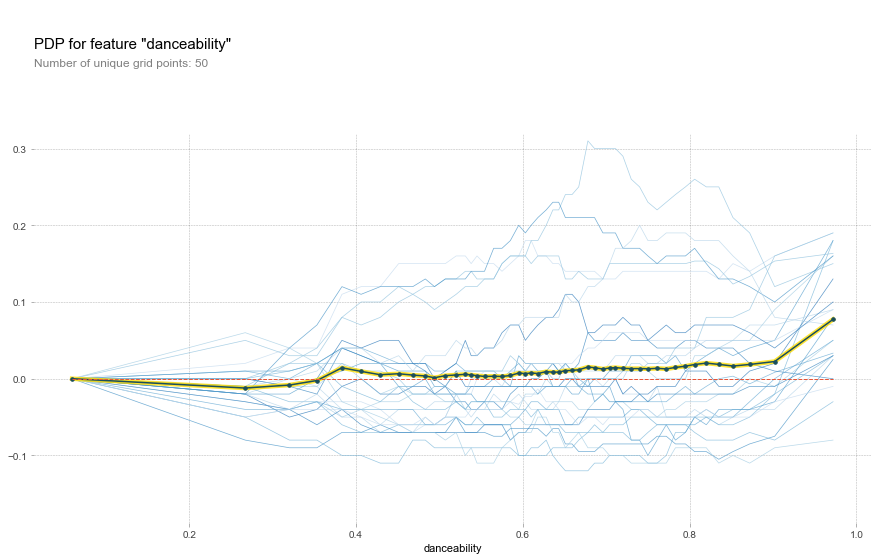

In [269]:
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=0.01)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <AxesSubplot:>,
  'pdp_ax': <AxesSubplot:xlabel='instrumentalness'>})

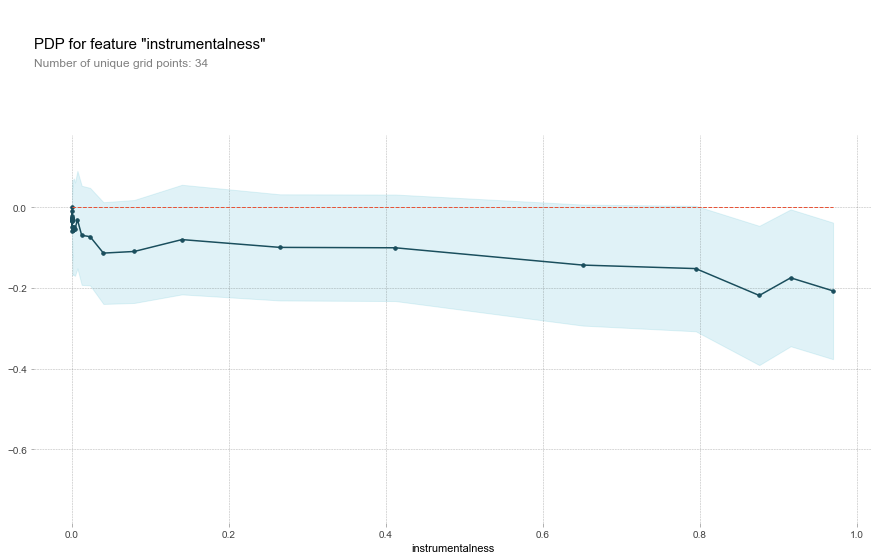

In [270]:
feature = 'instrumentalness'
isolated = pdp_isolate(
    model=pipeline_xg, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature,
    num_grid_points=50
)
pdp_plot(isolated, feature_name=feature, frac_to_plot=0.01)

In [271]:
df.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence', 'popular'],
      dtype='object')

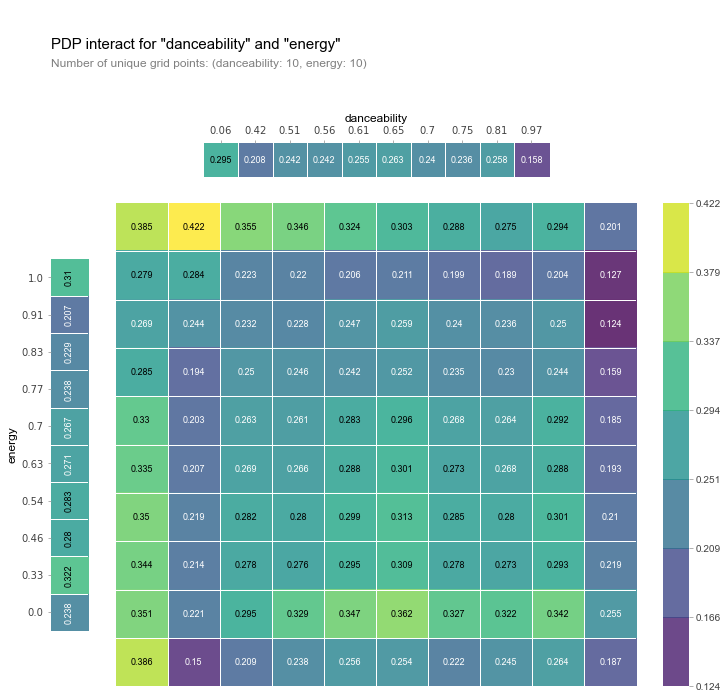

In [272]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['danceability', 'energy']

interaction = pdp_interact(
    model=pipeline_xg, 
    dataset=X_val, 
    model_features=X_val.columns, 
    features=features
)

pdp_interact_plot(interaction,feature_names=features, plot_type='grid', plot_pdp=True); 

In [273]:
#shapley plot for individual predictions
row = X_train.iloc[[0]]  

row 

,song_name,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
10415,Q.M.T.,165000,0.5,0.685,0.986,0.0,8,0.332,-3.832,1,0.208,127.963,4,0.212


In [274]:
pipeline_xg.predict(row)

array([0])

In [275]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

processor = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_val)

eval_set = [(X_train_processed, y_train), 
            (X_val_processed, y_val)]

model = XGBClassifier(n_estimators=1000, n_jobs=-1)
model.fit(X_train_processed, y_train, eval_set=eval_set, eval_metric='auc', 
          early_stopping_rounds=10)

[0]	validation_0-auc:0.69637	validation_1-auc:0.56900
[1]	validation_0-auc:0.73195	validation_1-auc:0.58309
[2]	validation_0-auc:0.74516	validation_1-auc:0.57681
[3]	validation_0-auc:0.76297	validation_1-auc:0.57768
[4]	validation_0-auc:0.78168	validation_1-auc:0.59141
[5]	validation_0-auc:0.79149	validation_1-auc:0.59423
[6]	validation_0-auc:0.80273	validation_1-auc:0.59898
[7]	validation_0-auc:0.80962	validation_1-auc:0.60229
[8]	validation_0-auc:0.81583	validation_1-auc:0.60338
[9]	validation_0-auc:0.82673	validation_1-auc:0.60803
[10]	validation_0-auc:0.83322	validation_1-auc:0.60586
[11]	validation_0-auc:0.84000	validation_1-auc:0.60701
[12]	validation_0-auc:0.84373	validation_1-auc:0.60684
[13]	validation_0-auc:0.84957	validation_1-auc:0.60408
[14]	validation_0-auc:0.85129	validation_1-auc:0.60340
[15]	validation_0-auc:0.86315	validation_1-auc:0.60342
[16]	validation_0-auc:0.86918	validation_1-auc:0.60331
[17]	validation_0-auc:0.87421	validation_1-auc:0.60498
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [276]:
from sklearn.metrics import roc_auc_score
X_test_processed = processor.transform(X_test)
class_index = 1
y_pred_proba = model.predict_proba(X_test_processed)[:, class_index]
print(f'Test ROC AUC for class {class_index}:')
print(roc_auc_score(y_test, y_pred_proba)) # Ranges from 0-1, higher is better

Test ROC AUC for class 1:
0.5799492643328259


In [277]:
import shap

explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row, 
    link='logit' 
)

I can see that loudness has the biggest impact on this prediction with audio valence also having a big effect.

In [278]:
import shap
row = X_train.iloc[[75]] 
explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row, 
    link='logit' 
)

In [279]:
from collections import Counter
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index #filtre
        # store indeces
        outlier_indices.extend(outlier_list_col) #The extend() extends the list by adding all items of a list (passed as an argument) to the end.
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2) 
    
    return multiple_outliers